In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('E:\Python\ML\Heartattack_prediction_data.xlsx')
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [3]:
df.tail()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
4307,0,53,76.0,215.0,21.51,0,0.0,1,206.0,92.0,1.0,0,1,1
4308,0,49,65.0,98.0,20.68,0,0.0,0,96.0,63.0,0.0,0,0,0
4309,0,65,90.0,87.0,30.47,0,0.0,1,179.5,114.0,0.0,0,0,0
4310,1,46,75.0,74.0,23.59,1,20.0,0,119.0,77.5,0.0,0,0,0
4311,0,63,95.0,75.0,22.15,1,40.0,0,116.0,69.0,0.0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [5]:
df.shape

(4312, 14)

In [6]:
df.isna().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(68)

In [8]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['Heart Rate'].fillna(df['Heart Rate'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['Ciggarates(Per Day)'].fillna(df['Ciggarates(Per Day)'].mean(), inplace = True)
df['ON BP Medication'].fillna(df['ON BP Medication'].mode()[0], inplace = True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4244.0,0.428841,0.494969,0.00,0.0000,0.00,1.0000,1.0
Age,4244.0,49.579171,8.572608,32.00,42.0000,49.00,56.0000,70.0
Heart Rate,4244.0,75.875803,12.020914,44.00,68.0000,75.00,83.0000,143.0
Glucose,4244.0,82.097802,23.012205,40.00,72.0000,79.00,86.0000,394.0
BMI,4244.0,25.800972,4.069629,15.54,23.0775,25.41,28.0325,56.8
Smoker,4244.0,0.493874,0.500021,0.00,0.0000,0.00,1.0000,1.0
Ciggarates(Per Day),4244.0,8.999672,11.878420,0.00,0.0000,0.00,20.0000,70.0
Hypertension,4244.0,0.310556,0.462776,0.00,0.0000,0.00,1.0000,1.0
Systolic BP,4244.0,132.346607,22.029115,83.50,117.0000,128.00,144.0000,295.0
Diastolic BP,4244.0,82.891730,11.910490,48.00,75.0000,82.00,90.0000,142.5


In [11]:
num_col = df.select_dtypes(include=np.number).columns.to_list()
num_col

['Sex',
 'Age',
 'Heart Rate',
 'Glucose',
 'BMI',
 'Smoker',
 'Ciggarates(Per Day)',
 'Hypertension',
 'Systolic  BP',
 'Diastolic BP',
 'ON BP Medication',
 'Previous Stroke',
 'Diabetic',
 'RiskOfCHD']

Sex


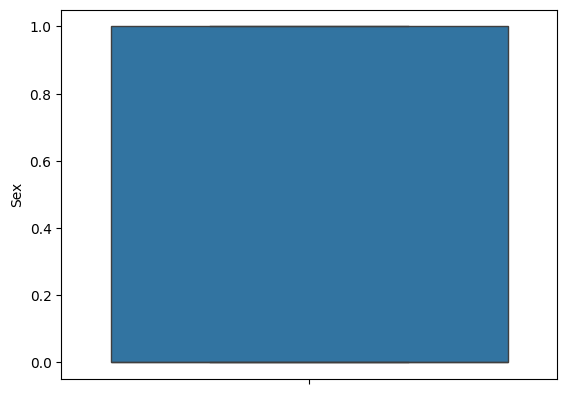

Age


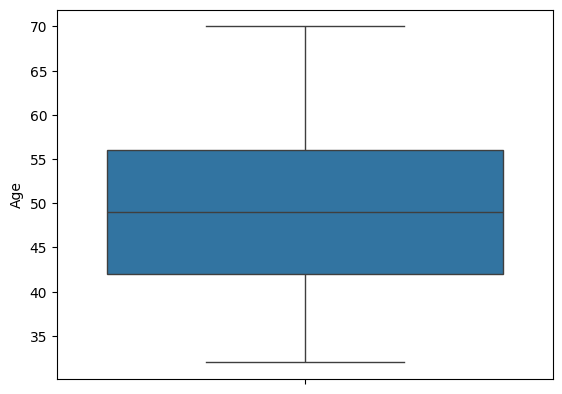

Heart Rate


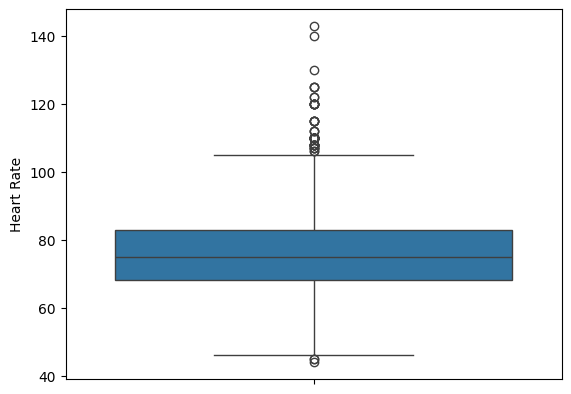

Glucose


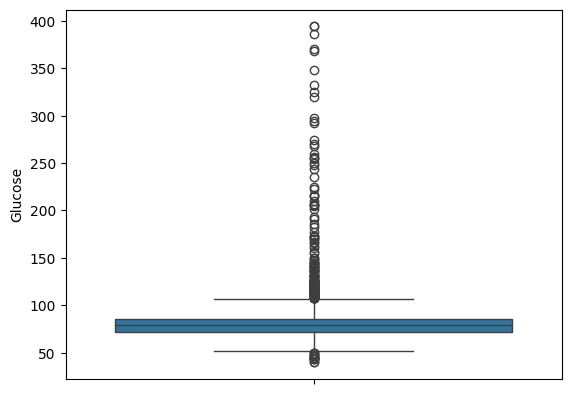

BMI


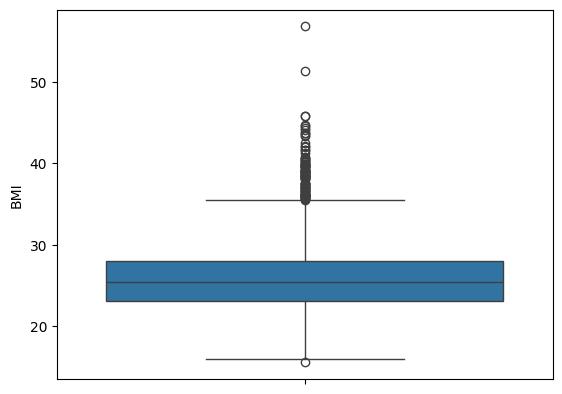

Smoker


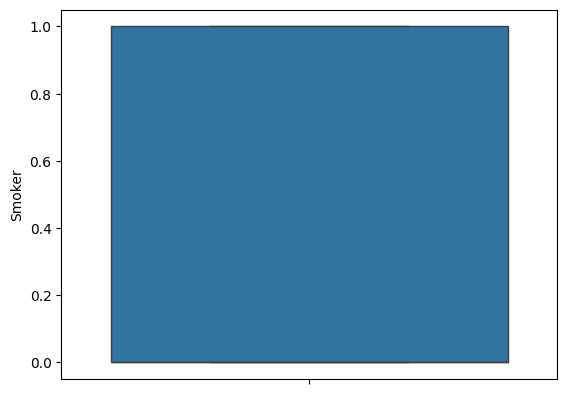

Ciggarates(Per Day)


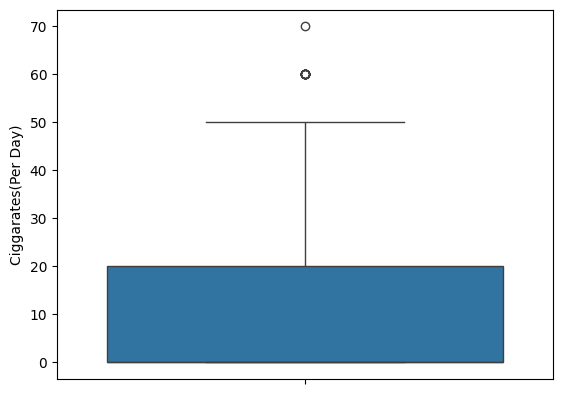

Hypertension


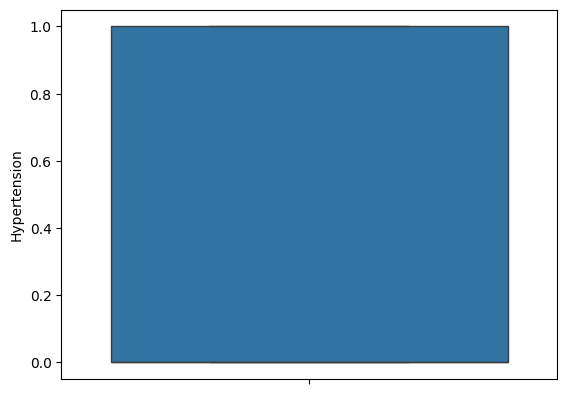

Systolic  BP


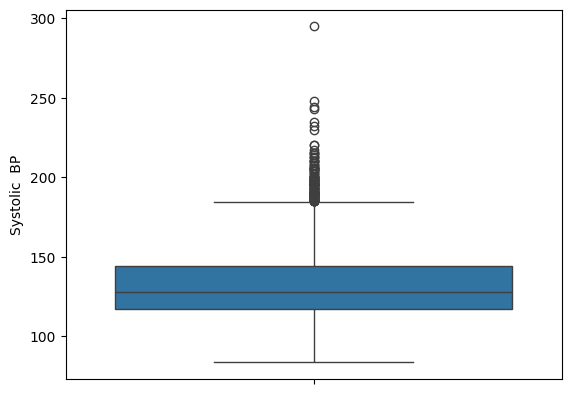

Diastolic BP


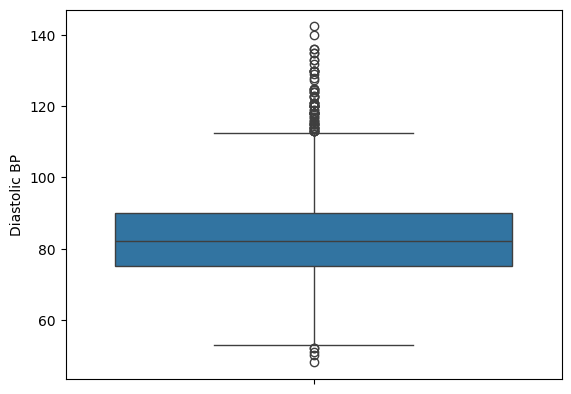

ON BP Medication


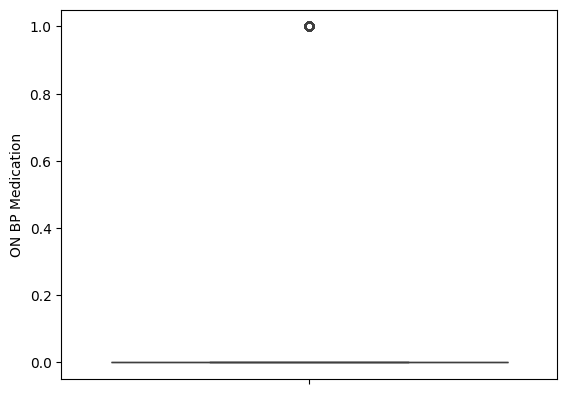

Previous Stroke


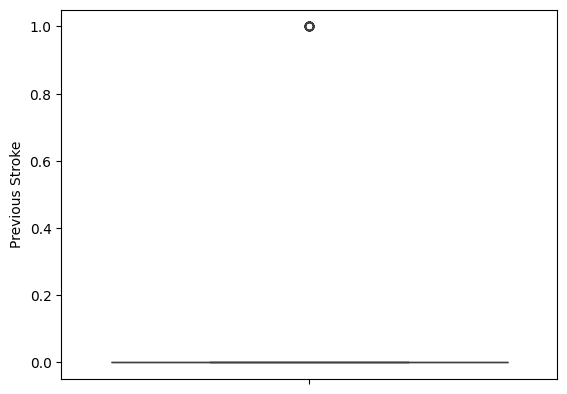

Diabetic


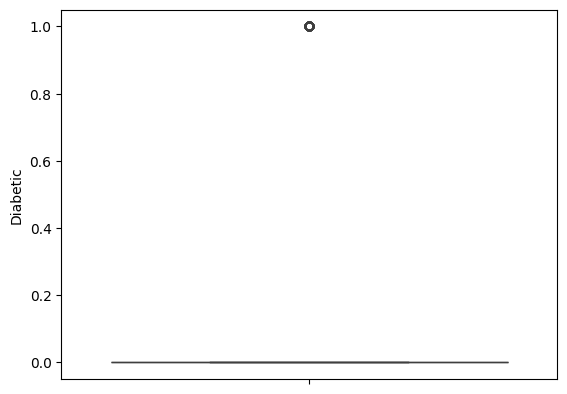

RiskOfCHD


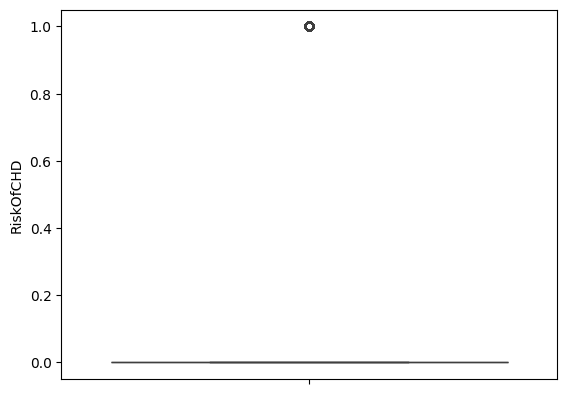

In [12]:
for i in num_col:
    print(i)

    sns.boxplot(df[i])
    plt.show()

<Axes: >

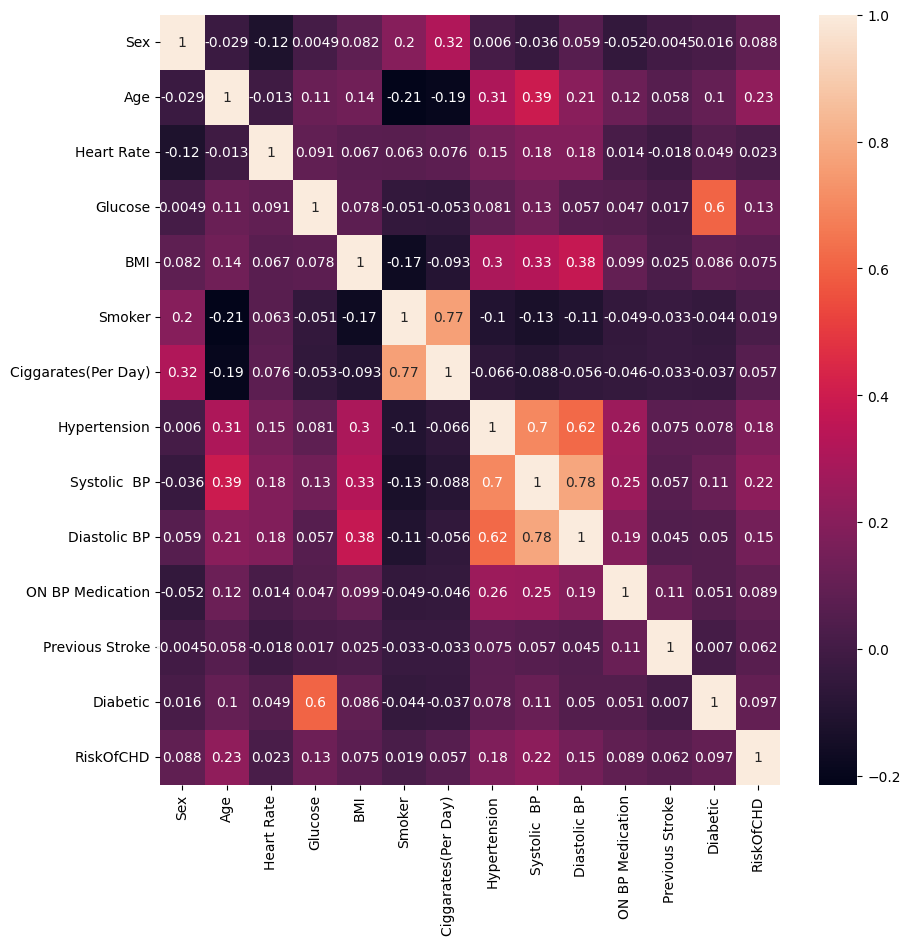

In [13]:
corr = df[num_col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
import pydotplus

In [15]:
['Sex',
 'Age',
 'Heart Rate',
 'Glucose',
 'BMI',
 'Smoker',
 'Ciggarates(Per Day)',
 'Hypertension',
 'Systolic  BP',
 'Diastolic BP',
 'ON BP Medication',
 'Previous Stroke',
 'Diabetic',
 'RiskOfCHD']

['Sex',
 'Age',
 'Heart Rate',
 'Glucose',
 'BMI',
 'Smoker',
 'Ciggarates(Per Day)',
 'Hypertension',
 'Systolic  BP',
 'Diastolic BP',
 'ON BP Medication',
 'Previous Stroke',
 'Diabetic',
 'RiskOfCHD']

In [16]:
df['Age'] = pd.cut(df['Age'], bins=[30,40,50,60,70],labels=[0,1,2,3])
df['Systolic  BP'] = pd.cut(df['Systolic  BP'], bins=[50,150,250,350],labels=[0,1,2])
df['Glucose'] = pd.cut(df['Glucose'], bins=[40,140,240,340,440],labels=[0,1,2,3],include_lowest=True)
df['Heart Rate'] = pd.cut(df['Heart Rate'], bins=[40,140,240],labels=[0,1])
df['BMI'] = pd.cut(df['BMI'], bins=[10,20,30,40,50,60],labels=[0,1,2,3,4])

In [17]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,0,0,0,1,0,0.0,0,0,70.0,0.0,0,0,0
1,0,1,0,0,1,0,0.0,0,0,81.0,0.0,0,0,0
2,1,1,0,0,1,1,20.0,0,0,80.0,0.0,0,0,0
3,0,3,0,0,1,1,30.0,1,0,95.0,0.0,0,0,1
4,0,1,0,0,1,1,23.0,0,0,84.0,0.0,0,0,0


In [18]:
X = df[['Age','Systolic  BP','Glucose','Sex','ON BP Medication']]
Y = np.array(df['RiskOfCHD']).reshape(-1,1)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X,Y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2)

In [21]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

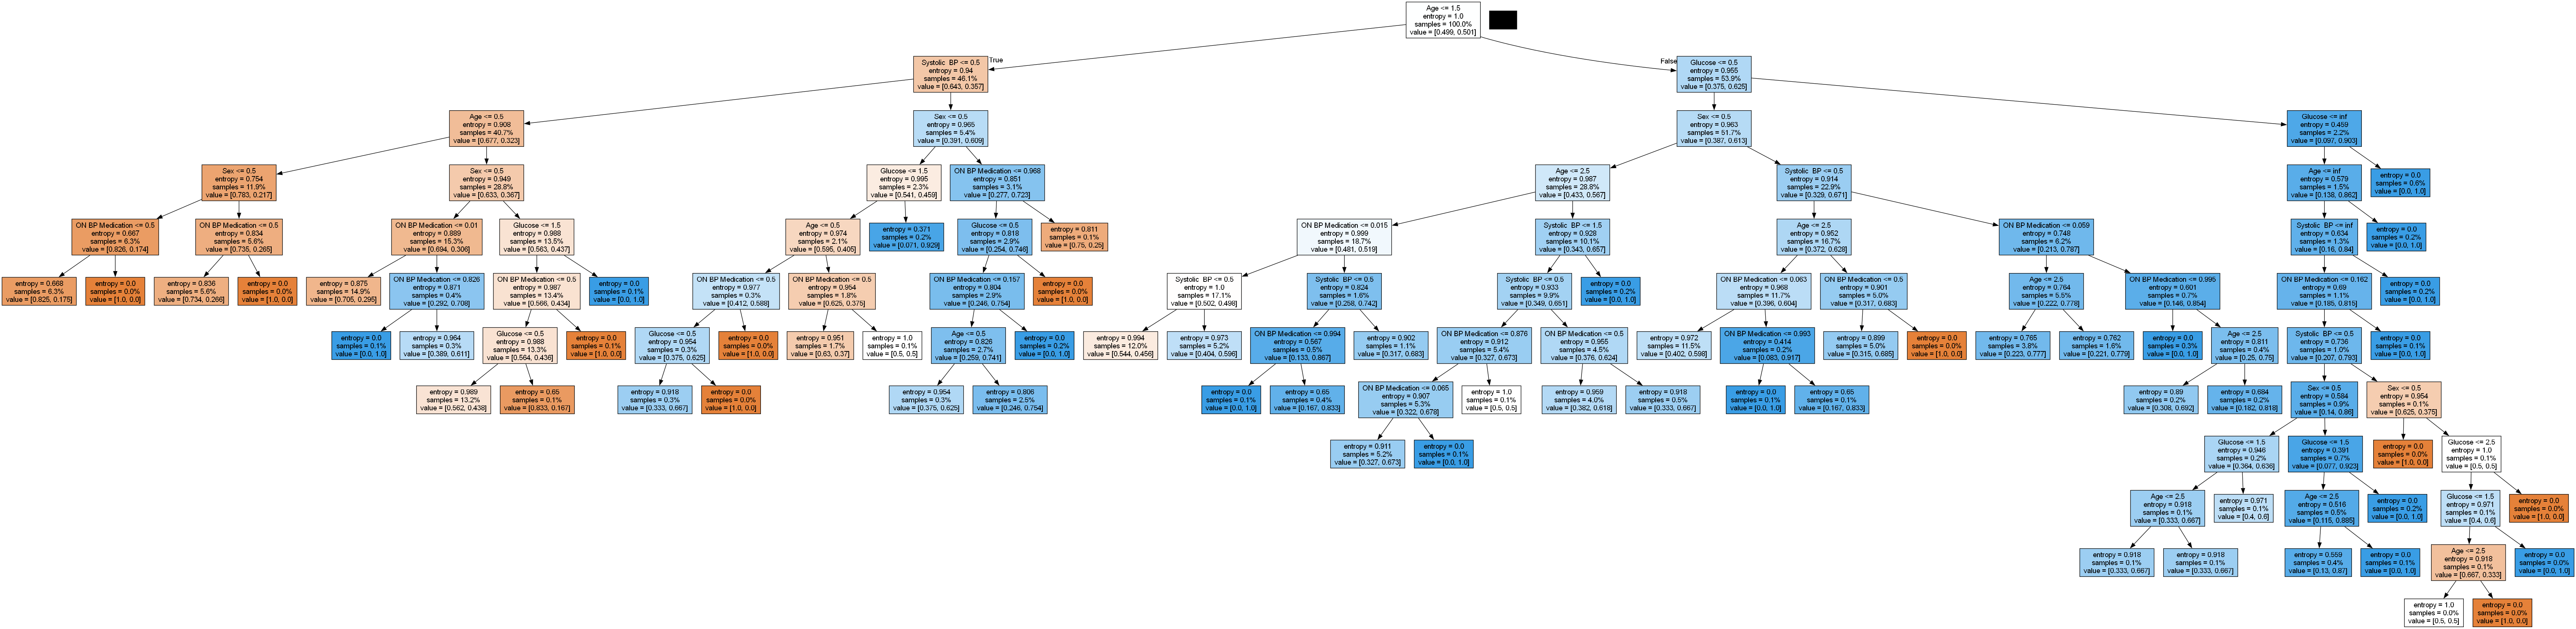

In [22]:
dot_data = export_graphviz(model, feature_names=X.columns, out_file=None, rounded=False, proportion=True, precision=3,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
y_pred = model.predict(x_test)

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[512, 214],
       [262, 452]])

Text(50.722222222222214, 0.5, 'Predicted')

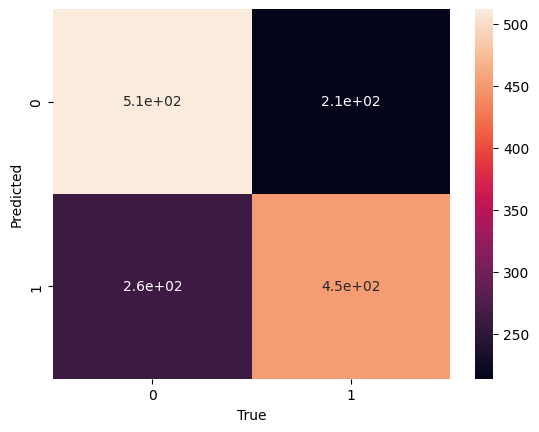

In [25]:
sns.heatmap(cm,annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

In [26]:
df['RiskOfCHD'].value_counts()

RiskOfCHD
0    3599
1     645
Name: count, dtype: int64

In [27]:
a = pd.DataFrame(Y_resampled)
a.value_counts()

0
0    3599
1    3599
Name: count, dtype: int64

In [28]:
accuracy_score(y_test,y_pred)

0.6694444444444444

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=500,max_samples=0.8) #100 trees and 80% of the dataset to create the samples
rf_classifier.fit(x_train,y_train)
rf_classifier

RandomForestClassifier(max_samples=0.8, n_estimators=500)

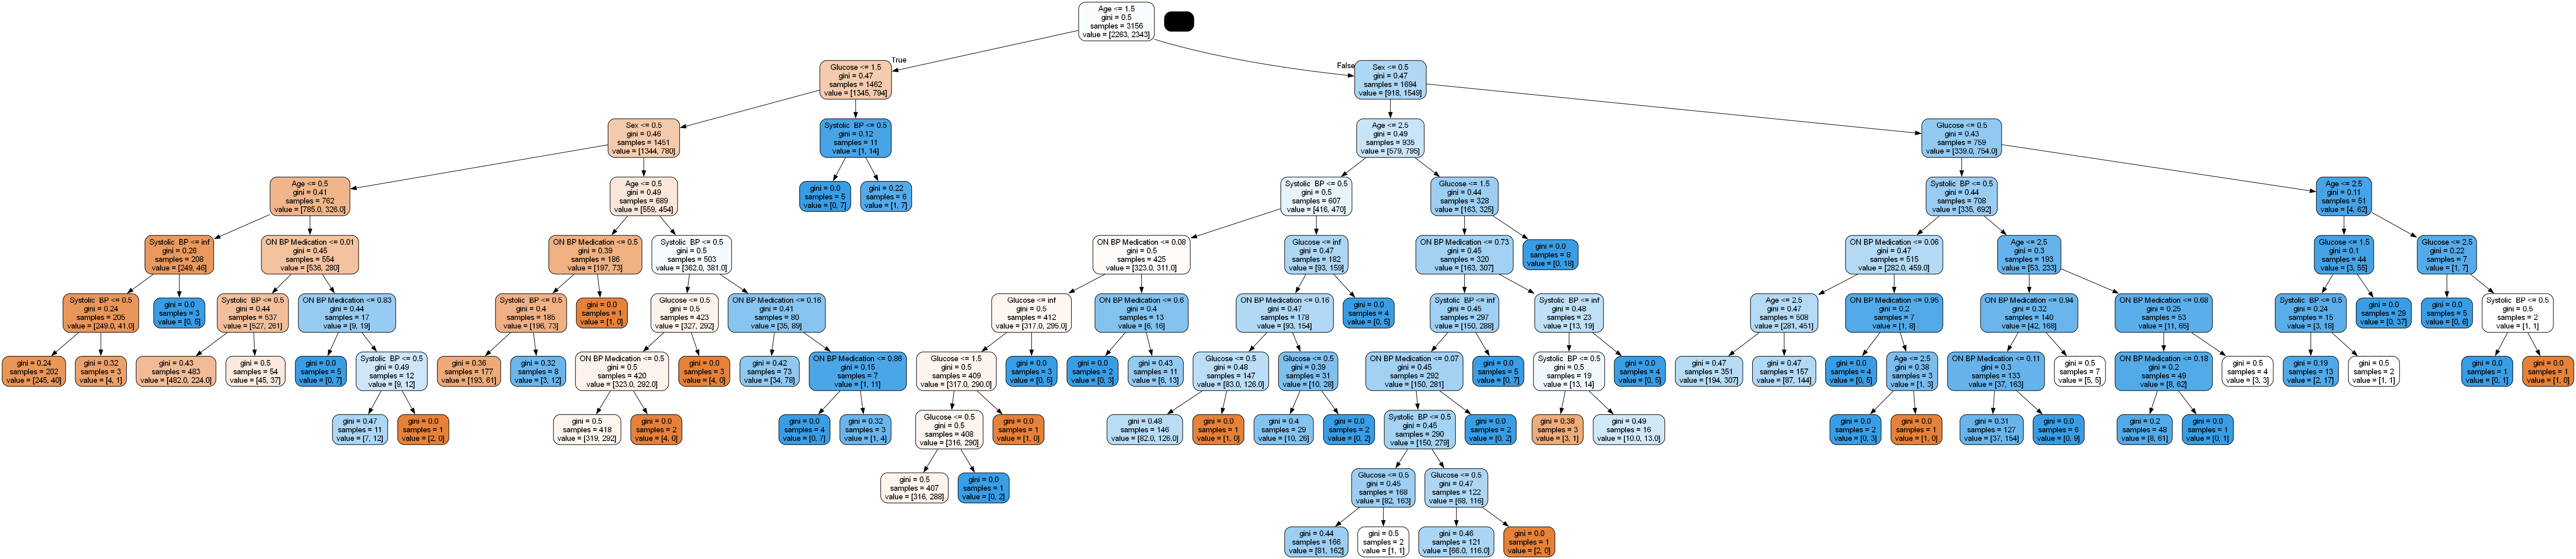

In [30]:
estimator = rf_classifier.estimators_[1] #chhosing a tree from the 100 trees in the rf
dot_data = export_graphviz(estimator, feature_names=x_train.columns, out_file=None, rounded=True, proportion=False, precision=2,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
cm1 = confusion_matrix(y_test,rf_classifier.predict(x_test))
cm1

array([[510, 216],
       [261, 453]])

Text(50.722222222222214, 0.5, 'Predicted')

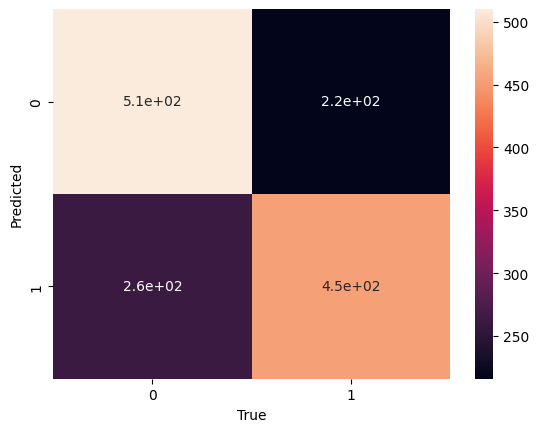

In [32]:
sns.heatmap(cm1,annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')